# Finding roots

This notebook complements our text on numerical analysis presenting basic code to illustrate the ideas in the text. As is frequently the case, we'll be using the following libraries:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

## Brent's algorithm

Brent's algorithm is a powerful hybrid algorithm built on top of some of the ideas presented in the chapter. It's implemented in SciPy as `scipy.optimize.brentq`. It finds the *roots* of a function $f$, i.e. points where $f(x)=0$. Like the bisection method (discussed soon), it requires an interval $(a,b)$ on which $f$ changes sign. Likes Newton's method (discussed soon after) it converges *very* fast. Suppose, for example, that we want to solve $x^5-x-1=0$. We start with a graph of the function to see (approximately) where it crosses the $x$ axis.

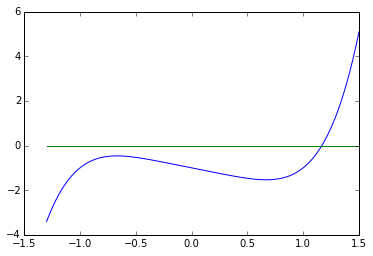

In [2]:
def f(x): return x**5 - x - 1
xs = np.linspace(-1.3,1.5,100)
ys = f(xs)
plt.plot(xs,ys)
zeros = np.zeros(100)
plt.plot(xs,zeros)

It sure looks like there is a root between 1 and 2.  Let's find it more precisely.

In [3]:
from scipy.optimize import brentq
brentq(f,1,2)

1.1673039782610168

## The bisection method

Here is the Python implementation of the bisection method from our text.

In [4]:
import numpy as np
class SignError(Exception):
    def __str__(self):
        return 'function has same signs at the endpoints'
class IntervalError(Exception):
    def __str__(self):
        return 'need a<b'
def bisection(f,a,b,tol=10**(-15)):
    if b <= a:
        raise IntervalError
    y1 = f(a)
    if y1 == 0:
        return a
    y2 = f(b)
    if y2 == 0:
        return b
    if np.sign(y1)*np.sign(y2) > 0:
        raise SignError
    cnt = 0
    while abs(a-b)>tol and cnt < 100:
        c = (a+b)/2
        y3 = f(c)
        if y3 == 0:
            return c
        if np.sign(y1)*np.sign(y3) < 0:
            b = c
            y2 = y3
        elif np.sign(y2)*np.sign(y3) < 0:
            a = c
            y1 = y3
        cnt = cnt+1
    return a

And here's how to use it.

In [5]:
def f(x): return x**5-x-1
bisection(f,0,2)

1.167303978261418

## Functional iteration

In the text, we discuss the solution of $\sin(x/2)=x\cos(x/2)$ and decide to rewrite it as $2\arctan(x)=x$ allowing us to solve it by the iteration of $f(x)=2\arctan(x)$. The following graph indicates that we might expect this to be successful.

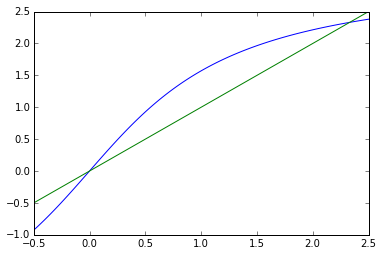

In [6]:
def f(x): return 2*np.arctan(x)
xs = np.linspace(-0.5,2.5,100)
ys = f(xs)
plt.plot(xs,ys)
plt.plot(xs,xs)

Here is the actual iteration process. The starting point of `x1=2` is based on the graph.

In [7]:
import numpy as np
def f(x): return 2*np.arctan(x)
tol = 10**(-16)
cnt = 0
x1 = 2
x2 = f(x1)
while abs(x1-x2) > tol and cnt < 100:
    x1 = x2
    x2 = f(x2)
    cnt = cnt+1
x2

2.3311223704144224

We can add the fixed point to the graph.

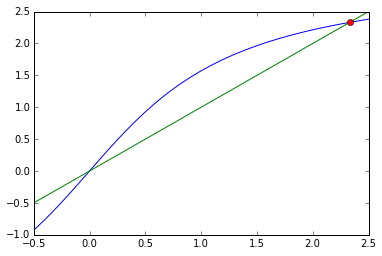

In [8]:
plt.plot(xs,ys)
plt.plot(xs,xs)
plt.plot(x2,x2,'o')